![Movie popcorn on red background](redpopcorn.jpg)

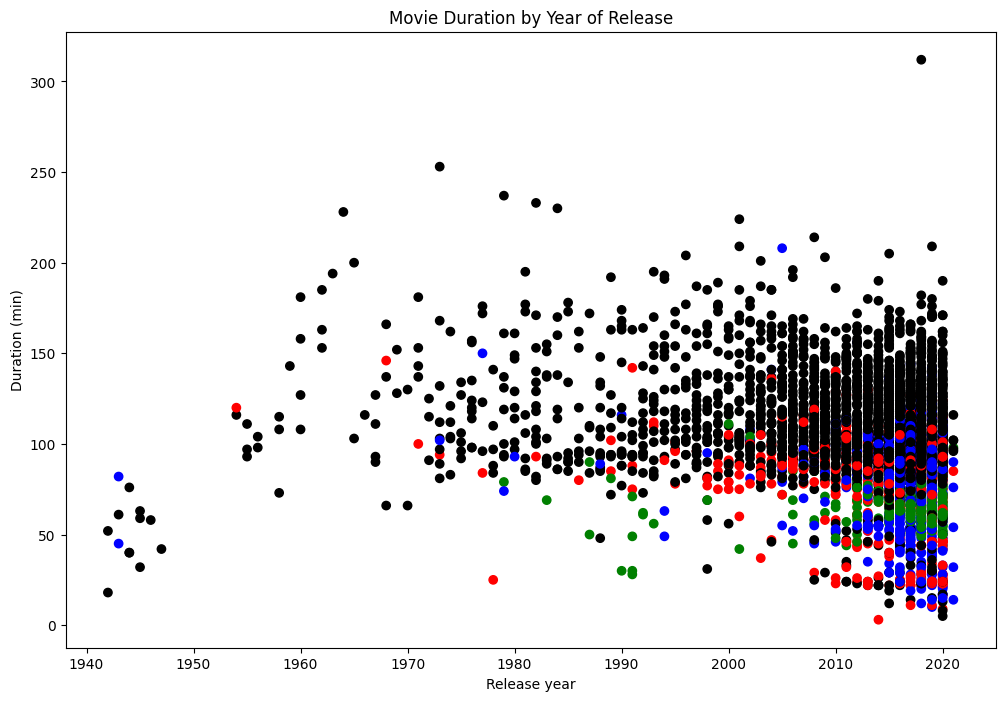

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

# Filter for durations shorter than 60 minutes
short_movies = netflix_movies[netflix_movies.duration < 60]

# Define an empty list
colors = []

# Iterate over rows of netflix_movies
for label, row in netflix_movies.iterrows() :
    if row["genre"] == "Children" :
        colors.append("red")
    elif row["genre"] == "Documentaries" :
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[:10]

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

# Are we certain that movies are getting shorter?
answer = "no"

In [3]:
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [4]:
print(netflix_df['genre'].unique())


['International TV' 'Dramas' 'Horror Movies' 'Action' 'Crime TV'
 'Documentaries' 'Independent Movies' 'Comedies' 'Sports Movies'
 'Anime Series' 'Reality TV' 'TV Comedies' 'Docuseries' 'Uncategorized'
 'British TV' 'International Movies' 'Sci-Fi' 'Kids' 'Children' 'TV Shows'
 'Classic Movies' 'Thrillers' 'Stand-Up' 'Anime Features' 'Music'
 'TV Dramas' 'TV Horror' 'TV Action' 'Classic' 'Romantic TV' 'Cult Movies'
 'TV Sci' 'Romantic Movies' 'Spanish-Language' 'LGBTQ Movies']


In [5]:
# Drop rows with missing genres
netflix_df = netflix_df.dropna(subset=['genre'])

# Create a list of all genres
all_genres = netflix_df['genre'].str.split(',').explode()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Display the genre counts
print(genre_counts)


genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
International TV         690
Children                 502
Crime TV                 369
Kids                     359
Stand-Up                 354
Horror Movies            244
British TV               232
Docuseries               194
Anime Series             148
International Movies     114
TV Comedies              110
Reality TV               102
Classic Movies            77
TV Dramas                 62
Uncategorized             56
Thrillers                 49
TV Action                 37
Romantic TV               28
Classic                   21
Independent Movies        20
Anime Features            19
Music                     17
TV Shows                  12
Cult Movies               12
Sci-Fi                    11
TV Horror                 10
Romantic Movies            3
Spanish-Language           2
Sports Movies              1
TV Sci                     1
LGBTQ Mo

In [6]:
# Display the top 10 most common genres
top_genres = genre_counts.head(10)
print(top_genres)


genre
Dramas              1384
Comedies            1074
Documentaries        751
Action               721
International TV     690
Children             502
Crime TV             369
Kids                 359
Stand-Up             354
Horror Movies        244
Name: count, dtype: int64


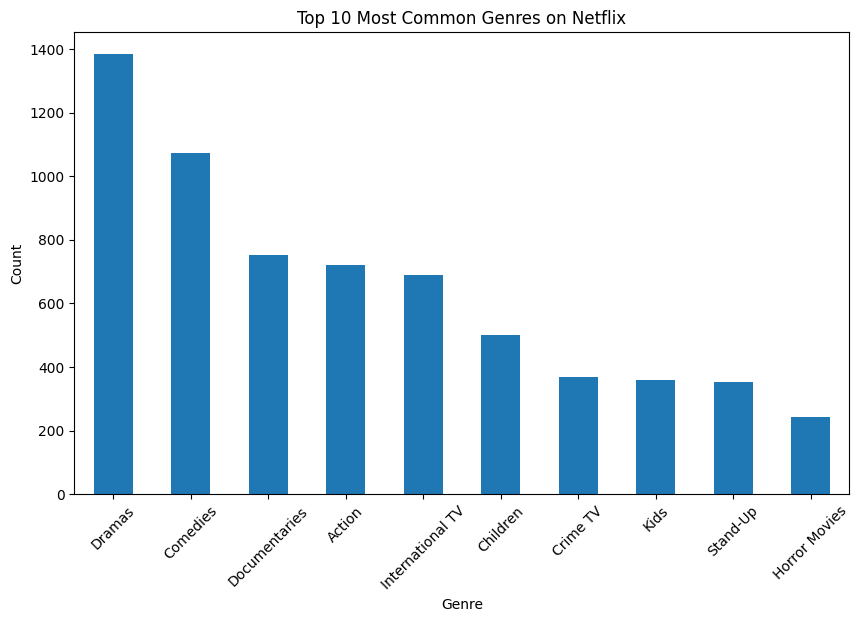

In [7]:
import matplotlib.pyplot as plt

# Plot the top 10 genres
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: count, Length: 73, dtype: int64


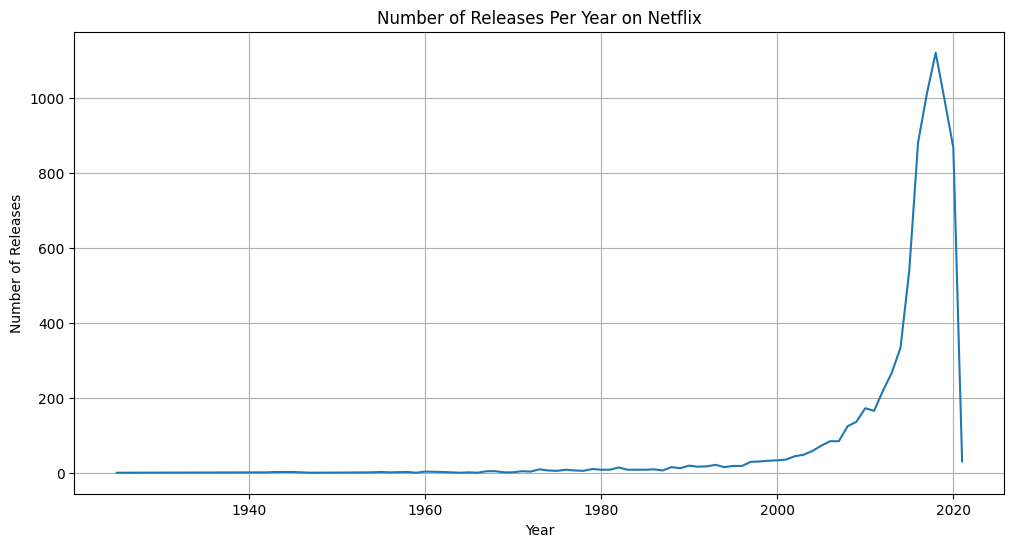

In [8]:
yearly_releases = netflix_df['release_year'].value_counts().sort_index()

# Display the yearly releases
print(yearly_releases)

# Plot the number of releases per year
plt.figure(figsize=(12,6))
yearly_releases.plot(kind='line')
plt.title('Number of Releases Per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()